In [1]:
import pandas as pd
import numpy as np
import re

data = pd.read_csv('properati.csv')

### **Barrios Porteños y sub-distritos**

In [2]:
# total de registros en 'Capital Federal'

data.loc[data.state_name == 'Capital Federal','state_name'].count()

32316

In [3]:
# total de distritos incluidos en (debajo de) state_name == 'Capital Federal'

# 48 barrios porteños + sub-distritos + etiqueta 'Capital Federal'

barrios_zonas = list(data.loc[data.state_name == 'Capital Federal','place_with_parent_names']\
    .apply(lambda string: string.split('|')[-2]).unique())

len(barrios_zonas)

62

In [4]:
# máscara de barrios y zonas (incluye barrios no porteños con mismo nombre)

# Ejemplo
#|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Constitución|    75
#|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Abasto|                     26
#|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Pompeya|          9
#|Argentina|Entre Ríos|Villa Urquiza|                                    3

# hay más Verdaderos que registros bajo state_name 'Capital Federal'

mask_barrios_zonas = data.loc[:,'place_with_parent_names']\
    .apply(lambda string: string.split('|')[-2] in barrios_zonas)

mask_barrios_zonas.value_counts()

False    88791
True     32429
Name: place_with_parent_names, dtype: int64

In [5]:
# DATA SET CON BARRIOS PORTEÑOS: barrios_zonas_capital

# registros en state_name 'Capital Federal' y coincidentes con barrios y sub-distritos porteños

barrios_zonas_capital = data.loc[(data.state_name == 'Capital Federal') & (mask_barrios_zonas),:]

barrios_zonas_capital.operation.count()

32316

### **Capitales de Provincia** (excluída Capital Federal)

In [6]:
# lista de capitales, exluída capital federal

capitales = ['La Plata','San Fernando del Valle de Catamarca','Resistencia','Rawson','Córdoba','Corrientes','Paraná','Formosa','San Salvador de Jujuy','Santa Rosa','La Rioja','Mendoza','Posadas','Neuquén','Viedma','Salta','San Juan','San Luis','Río Gallegos','Santa Fe','Santiago del Estero','Ushuaia','San Miguel de Tucumán']
len(capitales), 'Capital Federal' in capitales

(23, False)

In [7]:
# DATA SET CON CAPITALES DE PROVINCIA: capitales_provincia

# la máscara se hace con place_name (no con state_name)
# para no confundir nombre de ciudad con nombre de provincia

mascara_capitales = data.place_name.apply(lambda place: place in capitales)
capitales_provincia = data.loc[mascara_capitales]

capitales_provincia.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
10,10,sell,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4200833,-64.1887761",-31.420083,...,NaN,46.235139,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boy_venta_casa_c...,"Hermosa casa sin terminar de 3 dormitorios, ba...",Casa sin terminar en Falda de Cañete. ...,https://thumbs4.properati.com/3/mQkhIxXpTTbMSc...
32,32,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4053736,-64.1562667",-31.405374,...,50.0,616.920400,11000.000000,NaN,3.0,NaN,http://www.properati.com.ar/15bry_venta_depart...,"EN VENTA, departamento ubicado en barrio Pueyr...",Departamento apto crédito! Barrio Pueyrredon,https://thumbs4.properati.com/0/VUXj3pHJP7wl8p...
73,73,sell,house,Posadas,|Argentina|Misiones|Posadas|,Argentina,Misiones,3429886.0,"-27.3626903799,-55.8957060138",-27.362690,...,150.0,888.888889,1333.333333,NaN,5.0,NaN,http://www.properati.com.ar/15bxv_venta_casa_p...,SE VENDE CASA EN EL MICROCENTRO DE 150 mts2 CO...,SE VENDE CASA DE 2 DORMITORIOS EN EL MICROCENT...,https://thumbs4.properati.com/3/DwzoBH77v0mQhk...
78,78,sell,house,Posadas,|Argentina|Misiones|Posadas|,Argentina,Misiones,3429886.0,"-27.3554665957,-55.9021115026",-27.355467,...,18615.0,1181.839923,295.460650,NaN,5.0,NaN,http://www.properati.com.ar/15byn_venta_casa_p...,"S/AVDA COSTANERA , NUEVA ZONA GASTRONOMICA...",Oportunidad! Casa zona Bahía el Brete,https://thumbs4.properati.com/2/18AMH0DDp4Xboq...


### **Capitales + Capital**

In [8]:
import copy
capitales_mas_capital = copy.deepcopy(capitales)
capitales_mas_capital.insert(0,'Capital Federal')

print(len(capitales_mas_capital))

24


### **Interior Provincial** (provincias sin capitales)

In [9]:
# nueva lista de capitales con 'Capital Federal' para luego
# excluir del DF

mascara_interior_provincial = data.place_name\
    .apply(lambda place: place not in capitales_mas_capital)

In [10]:
# DATA SET CON MUNICIPIOS/DEPARTAMENTOS DE PROVINCIA: interior_provincial

# excluyo a los place name que no se corresponden a las capitales
# de provincia, más los place name incluidos en "Capital Federal"

interior_provincial = data.loc[(data.state_name != 'Capital Federal') & mascara_interior_provincial,]

interior_provincial.loc[:,['place_name','place_with_parent_names','state_name']].head()

,place_name,place_with_parent_names,state_name
4,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica
5,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Entre Ríos
6,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte
9,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe
11,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Bs.As. G.B.A. Zona Norte


### **Nueva columna con nombres de provincia**
state_name + Buenos Aires agrupado

In [11]:
# agrego nueva con provincias (agrupando Buenos Aires)

pattern = '(Bs.As.)|(Buenos Aires)'
regex = re.compile(pattern)

buenos_aires = data.state_name.apply(lambda state: state if state is np.NaN else regex.search(state))
data['provincia'] = data.loc[:,'state_name']
data.loc[buenos_aires.notnull(),'provincia'] = 'Buenos Aires'
data.loc[:,'provincia'].value_counts()

Buenos Aires           61131
Capital Federal        32316
Córdoba                12069
Santa Fe               10172
Río Negro                808
Neuquén                  733
Mendoza                  681
Tucumán                  674
Corrientes               583
Misiones                 464
Entre Ríos               369
Salta                    278
Chubut                   259
San Luis                 252
La Pampa                 157
Formosa                   65
Chaco                     57
San Juan                  40
Tierra Del Fuego          31
Catamarca                 27
Jujuy                     26
Santa Cruz                20
Santiago Del Estero        4
La Rioja                   4
Name: provincia, dtype: int64

### **Regiones**

In [12]:
regiones = {'Capital Federal':'Pampeana'
,'Buenos Aires':'Pampeana'
,'Santa Fe':'Pampeana'
,'Entre Ríos':'Mesopotamica'
,'Córdoba':'Central'
,'Misiones':'Mesopotamica'
,'Salta':'Noroeste'
,'Neuquén':'Patagonica'
,'Río Negro':'Patagonica'
,'San Luis':'Cuyo'
,'Mendoza':'Cuyo'
,'Corrientes':'Mesopotamica'
,'Chubut':'Patagonica'
,'Tucumán':'Noroeste'
,'La Pampa':'Pampeana'
,'Chaco':'Noreste'
,'San Juan':'Cuyo'
,'Santa Cruz':'Patagonica'
,'Tierra Del Fuego':'Patagonica'
,'Catamarca':'Noroeste'
,'Santiago Del Estero':'Noroeste'
,'Jujuy':'Noroeste'
,'La Rioja':'Noroeste'
,'Formosa':'Noreste'}

In [13]:
#data['regiones'] = data.state_name\
    #.apply(lambda state: regiones[state] if state in regiones.keys())
    
data['region'] = data.provincia.apply(lambda state: regiones[state] if state in regiones.keys() else np.NaN)
data['region'].value_counts()

Pampeana        103776
Central          12069
Patagonica        1851
Mesopotamica      1416
Noroeste          1013
Cuyo               973
Noreste            122
Name: region, dtype: int64

### **Conteo de nulos por distrito**
#### (columnas: price, price_aprox_usd, surface_total_in_m2, surface_covered_in_m2)

In [14]:
# NULOS TOTALES

# porcentual de nulos totales en columnas de precio
print('Precios/monedas:')
print(data.currency.isnull().sum()/ data.shape[0])
print(data.price.isnull().sum() / data.shape[0])
print(data.price_aprox_local_currency.isnull().sum() / data.shape[0])
print(data.price_aprox_usd.isnull().sum() / data.shape[0],'\n')

# porcentual de nulos totales en columnas de superficie
print('Superficies:')
print(data.surface_total_in_m2.isnull().sum() / data.shape[0])
print(data.surface_covered_in_m2.isnull().sum() / data.shape[0])
print(data.rooms.isnull().sum() / data.shape[0],'\n')

# porcentual de nulos totales en columna price_usd_per_m2
print('Superficies + precios:')
print(data.price_usd_per_m2.isnull().sum() / data.shape[0])

Precios/monedas:
0.16837980531265467
0.1683715558488698
0.1683715558488698
0.1683715558488698 

Superficies:
0.3244349117307375
0.16422207556508828
0.6090579112357697 

Superficies + precios:
0.43394654347467415


In [15]:
# Porcentual de datos cargados en 'price' por distrito: provincia

data.groupby('provincia')['price','surface_covered_in_m2']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))\
    .sort_values(by='price', ascending=False)

/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,price,surface_covered_in_m2
provincia,,
Tierra Del Fuego,100.000000,83.870968
Catamarca,96.296296,77.777778
Santa Cruz,95.000000,50.000000
Capital Federal,89.794529,92.762099
Buenos Aires,88.905792,85.035416
San Luis,82.539683,73.412698
Corrientes,80.617496,87.478559
Santiago Del Estero,75.000000,100.000000
Misiones,75.000000,55.387931


In [16]:
# Porcentual de datos cargados en 'price' por distrito: barrios

barrios_zonas_capital.groupby('place_name')['price','surface_covered_in_m2']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))\
    .sort_values(by='price', ascending=False)

/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,price,surface_covered_in_m2
place_name,,
Palermo Viejo,100.000000,100.000000
Villa Soldati,100.000000,93.333333
Villa General Mitre,100.000000,97.916667
Parque Chas,100.000000,97.727273
Villa Real,100.000000,100.000000
...,...,...
Palermo Chico,82.327586,96.551724
Once,82.323232,80.808081
Palermo Soho,81.472081,91.370558


In [17]:
# Porcentual de datos cargados en price por distrito: region

data.groupby('region')['price','surface_covered_in_m2']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))\
    .sort_values(by='price', ascending=False)

/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,price,surface_covered_in_m2
region,,
Pampeana,85.584335,86.162504
Central,74.886072,71.314939
Cuyo,70.709147,70.092497
Mesopotamica,66.949153,72.175141
Noreste,53.278689,27.049180
Patagonica,48.568341,61.156132
Noroeste,35.143139,41.559724


### **Completitud por cuartiles**
#### Según distrito

In [18]:
# Completitud en precios por provincia

precios_provincia = data.groupby('provincia')['price']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))\
    .sort_values(ascending=False)

pd.qcut(precios_provincia,4)

provincia
Tierra Del Fuego        (81.098, 100.0]
Catamarca               (81.098, 100.0]
Santa Cruz              (81.098, 100.0]
Capital Federal         (81.098, 100.0]
Buenos Aires            (81.098, 100.0]
San Luis                (81.098, 100.0]
Corrientes             (63.239, 81.098]
Santiago Del Estero    (63.239, 81.098]
Misiones               (63.239, 81.098]
Córdoba                (63.239, 81.098]
Mendoza                (63.239, 81.098]
Chubut                 (63.239, 81.098]
Chaco                  (42.767, 63.239]
Santa Fe               (42.767, 63.239]
La Rioja               (42.767, 63.239]
Río Negro              (42.767, 63.239]
Formosa                (42.767, 63.239]
Neuquén                (42.767, 63.239]
Jujuy                   (9.999, 42.767]
Salta                   (9.999, 42.767]
Entre Ríos              (9.999, 42.767]
Tucumán                 (9.999, 42.767]
La Pampa                (9.999, 42.767]
San Juan                (9.999, 42.767]
Name: price, dtype: category
C

In [19]:
# Completitud en precios por barrios porteños

precios_barrios = barrios_zonas_capital.groupby('place_name')['price']\
    .apply(lambda x: 100 * x.notnull().sum() / len(x))\
    .sort_values(ascending=False)

pd.qcut(precios_barrios,4)

place_name
Villa General Mitre     (96.129, 100.0]
Villa Real              (96.129, 100.0]
Palermo Viejo           (96.129, 100.0]
Parque Chas             (96.129, 100.0]
Villa Soldati           (96.129, 100.0]
                             ...       
Palermo Chico          (49.999, 89.633]
Once                   (49.999, 89.633]
Palermo Soho           (49.999, 89.633]
Capital Federal        (49.999, 89.633]
Catalinas              (49.999, 89.633]
Name: price, Length: 62, dtype: category
Categories (4, interval[float64]): [(49.999, 89.633] < (89.633, 94.278] < (94.278, 96.129] < (96.129, 100.0]]

### **Visualizaciones**

In [20]:
import seaborn as sns

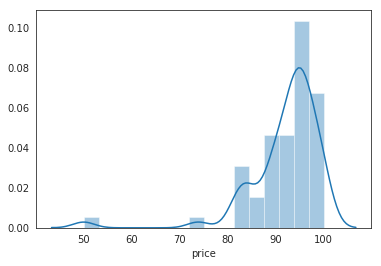

In [21]:
# Visualización de registros completos

with sns.axes_style('white'):
    sns.distplot(precios_barrios, label=precios_barrios.index)    

In [22]:
precios_barrios.astype(int)

place_name
Villa General Mitre    100
Villa Real             100
Palermo Viejo          100
Parque Chas            100
Villa Soldati          100
                      ... 
Palermo Chico           82
Once                    82
Palermo Soho            81
Capital Federal         73
Catalinas               50
Name: price, Length: 62, dtype: int64

### **Precios y Distritos**

In [23]:
# media de precios de departamento por barrio

barrios_zonas_capital_dptos = barrios_zonas_capital.loc[data.property_type == 'apartment',:]

np.around(barrios_zonas_capital_dptos.groupby('place_name')['price_aprox_usd'].mean(),2).sort_values(ascending=False).head(10)

place_name
Puerto Madero    890788.01
Palermo Chico    880346.16
Catalinas        550000.00
Recoleta         398242.85
San Cristobal    375677.03
Palermo Viejo    366473.77
Boedo            362447.07
Retiro           359212.61
Nuñez            345815.48
Las Cañitas      331226.92
Name: price_aprox_usd, dtype: float64

In [24]:
# media de precios de departamento por provincia

provincias_dptos = data.loc[data.property_type == 'apartment',:]

np.around(provincias_dptos.groupby('provincia')['price_aprox_usd'].describe(),2).sort_values(by='mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
provincia,,,,,,,,
Catamarca,12.0,1203333.33,363076.08,340000.00,1100000.00,1245000.00,1500000.00,1500000.0
San Juan,2.0,347671.12,356846.92,95342.25,221506.69,347671.12,473835.56,600000.0
Capital Federal,24154.0,245346.92,439774.43,5103.61,99012.50,145000.00,250000.00,46545445.0
Río Negro,151.0,200226.99,169673.12,16825.10,82100.00,128000.00,305377.50,800000.0
Salta,54.0,197347.72,539987.89,29163.51,49582.92,65943.46,99690.24,2850000.0
Chubut,23.0,162502.74,69225.98,25798.49,116083.68,160000.00,185000.00,315000.0
Corrientes,134.0,157638.35,106705.60,32000.00,100217.50,120000.00,195000.00,900000.0
San Luis,34.0,154421.27,279449.81,56083.67,73531.38,99678.64,113541.84,1700000.0
Buenos Aires,24605.0,153085.47,147402.73,5000.00,78000.00,115000.00,176116.00,2550000.0


In [25]:
# media de precios de departamentos en capitales de provincia (sin capital)

capitales_provincia_dptos = capitales_provincia.loc[data.property_type == 'apartment',:]

np.around(capitales_provincia_dptos.groupby('place_name')['price_aprox_usd'].describe(),2).sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Corrientes,3.0,380000.00,52915.03,320000.00,360000.00,400000.00,410000.00,420000.00
Salta,51.0,204855.12,554976.28,29163.51,49300.63,67390.70,98429.88,2850000.00
Ushuaia,5.0,176107.61,79243.04,92538.06,118000.00,150000.00,260000.00,260000.00
San Miguel de Tucumán,107.0,154633.01,363645.73,16719.77,70665.43,88976.75,115812.79,3300000.00
San Luis,28.0,153436.44,303668.44,66402.00,84781.38,99678.64,112500.00,1700000.00
Mendoza,76.0,149762.79,210331.75,33650.20,61692.04,75712.96,132500.00,1200000.00
Córdoba,4758.0,143553.69,233709.10,5047.53,62757.63,83256.22,115000.00,3200000.00
Neuquén,43.0,131071.83,75204.00,50475.30,81321.33,110000.00,150000.00,384397.52
Resistencia,7.0,119363.62,109528.24,28041.83,48512.38,70104.59,162687.10,315000.00


In [26]:
# media de precios de departamentos en interior de provincia

interior_provincial_dptos = interior_provincial.loc[data.property_type == 'apartment',:]

np.around(interior_provincial_dptos.groupby('place_name')['price_aprox_usd'].describe(),2).sort_values(by='count',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Mar del Plata,4181.0,111156.62,79719.78,9253.80,63935.39,85900.00,130000.00,1489000.0
Rosario,4140.0,130493.60,261753.87,4666.62,58887.86,75712.96,109924.00,4376078.0
Nordelta,1858.0,228157.22,117850.47,12843.16,151200.00,195000.00,271357.37,850000.0
Tigre,1322.0,169193.75,96813.04,7466.60,116350.00,135700.00,176825.00,1350000.0
Olivos,1010.0,269821.53,205355.67,66000.00,152050.00,225000.00,293450.00,2500000.0
Lomas de Zamora,778.0,143340.97,109944.01,17946.77,85000.00,110000.00,150000.00,1200000.0
Pilar,746.0,132965.13,74464.78,23000.00,80094.22,119000.00,168539.39,820000.0
Morón,694.0,160609.50,291229.69,20000.00,63000.00,77000.00,90000.00,2124000.0
Ramos Mejía,573.0,124210.08,114256.21,5159.69,77500.00,92000.00,130000.00,1750000.0


In [27]:
# media de precios de casas en interior de provincia

interior_provincial_casas = interior_provincial.loc[data.property_type == 'house',:]

np.around(interior_provincial_casas.groupby('place_name')['price'].describe(),2).sort_values(by='count',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Tigre,1696.0,425952.36,260335.02,30000.0,295000.0,360000.0,470000.0,3600000.0
Pilar,1262.0,431034.88,428512.49,22000.0,199000.0,300000.0,480000.0,3559500.0
Mar del Plata,1180.0,227678.12,320395.16,29000.0,119000.0,160000.0,250000.0,5000000.0
Nordelta,1019.0,766383.40,556806.50,107000.0,420000.0,570000.0,975000.0,6500000.0
Escobar,919.0,295541.89,214155.82,45000.0,200000.0,250000.0,330000.0,2400000.0
Ituzaingó,646.0,222711.30,497403.31,50000.0,120000.0,157500.0,235000.0,12000000.0
Benavidez,557.0,417511.31,258235.05,50000.0,275000.0,355000.0,480000.0,2000000.0
Martínez,552.0,550225.91,450040.81,80000.0,280000.0,400000.0,630000.0,2900000.0
Lomas de Zamora,551.0,255262.07,176413.26,44000.0,140000.0,200000.0,300000.0,1250000.0


In [28]:
# media de superficie cubierta de casas en interior de provincia

interior_provincial_casas = interior_provincial.loc[data.property_type == 'apartment',:]

np.around(interior_provincial_casas.groupby('place_name')['surface_covered_in_m2'].describe(),2).sort_values(by='count',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Rosario,5747.0,59.17,69.84,18.0,37.0,48.0,70.0,4650.0
Mar del Plata,3146.0,74.65,873.84,1.0,38.0,50.0,70.0,49000.0
Nordelta,2029.0,75.10,37.05,1.0,49.0,68.0,90.0,402.0
Tigre,1389.0,70.87,148.94,1.0,48.0,57.0,74.0,5426.0
Olivos,978.0,80.14,80.35,5.0,51.0,60.0,81.0,1112.0
Pilar,767.0,65.33,61.80,1.0,40.0,54.0,76.0,940.0
Morón,761.0,44.93,16.50,1.0,37.0,42.0,49.0,150.0
Lomas de Zamora,653.0,65.13,54.49,1.0,43.0,50.0,70.0,1000.0
Ramos Mejía,552.0,58.80,35.55,1.0,40.0,48.0,67.0,346.0


### **Correlaciones**

In [29]:
# correlación deptos. vs metros cuadrados cubiertos por barrios porteños

barrios_zonas_capital_dptos = barrios_zonas_capital.loc[data.property_type == 'apartment',:]
barrios_zonas_capital_dptos.loc[:,['price_aprox_usd','surface_covered_in_m2']].corr(method='pearson')

,price_aprox_usd,surface_covered_in_m2
price_aprox_usd,1.000000,0.038636
surface_covered_in_m2,0.038636,1.000000


In [30]:
# correlación casas vs metros cuadrados cubiertos por barrio

barrios_zonas_capital_casas= barrios_zonas_capital.loc[data.property_type == 'house',:]
barrios_zonas_capital_casas.loc[:,['price_aprox_usd','surface_covered_in_m2']].corr(method='pearson')

,price_aprox_usd,surface_covered_in_m2
price_aprox_usd,1.000000,0.483987
surface_covered_in_m2,0.483987,1.000000


In [31]:
# correlación dptos vs metros cuadrados cubiertos por capitales de provincia

capitales_dptos = capitales_provincia.loc[data.property_type == 'apartment',:]

capitales_dptos.loc[:,['price_aprox_usd','surface_covered_in_m2']].corr(method='pearson')

,price_aprox_usd,surface_covered_in_m2
price_aprox_usd,1.00000,0.02283
surface_covered_in_m2,0.02283,1.00000


In [32]:
# correlación casas vs metros cuadrados cubiertos por capitales de provincia

capitales_casas = capitales_provincia.loc[data.property_type == 'house',:]

capitales_casas.loc[:,['price_aprox_usd','surface_covered_in_m2']].corr(method='pearson')

,price_aprox_usd,surface_covered_in_m2
price_aprox_usd,1.000000,0.065702
surface_covered_in_m2,0.065702,1.000000


In [33]:
# correlación dptos vs metros cuadrados cubiertos por capitales de provincia

capitales_dptos = capitales_provincia.loc[data.property_type == 'apartment',:]

capitales_dptos.loc[:,['price_aprox_usd','surface_covered_in_m2']].corr(method='pearson')

,price_aprox_usd,surface_covered_in_m2
price_aprox_usd,1.00000,0.02283
surface_covered_in_m2,0.02283,1.00000
